# Project 2: Wrangling and Analyzing Data

>  by **EMMANUEL NCUBE**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#storedata">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

[WeRateDogs](https://twitter.com/dog_rates) is a Twitter account that rates people's dogs with a funny comment about the dog. More information about this twitter handle can be found [here](https://en.wikipedia.org/wiki/WeRateDogs). Our objective is to colect WeRateDogs twitter archive data from different sources and wrangle to create a clean and tidy dataframe, and then perform data analysis and visualization on the resultant dataframe.

In [193]:
# Create environment
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import matplotlib.pyplot as plt
import seaborn as sns
import configparser
import re
import os
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

<a id='gather'></a>

## Data Gathering
We will gather **all** three pieces of data for this project and load them in the notebook.

In [194]:
# read the twitter_archive_enhanced file into a dataframe
tweet_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [195]:
# sample rows
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He is 100% ready for the sports. 12/10 I would watch anything with him https://t.co/k0ddVUWTcu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782128353280/photo/1,12,10,Tucker,None,None,None,None
879,760641137271070720,NaN,NaN,2016-08-03 00:59:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Theo. He can walk on water. Still coming to terms with it. 12/10 magical af https://t.co/8Kmuj6SFbC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760641137271070720/photo/1,12,10,Theo,None,None,None,None
1467,694329668942569472,NaN,NaN,2016-02-02 01:21:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grady. He's very hungry. Too bad no one can find his food bowl. 9/10 poor pupper https://t.co/oToIkYnEGn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694329668942569472/photo/1,9,10,Grady,None,None,pupper,None
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1",10,10,Swagger,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10 https://t.co/xYGdBrMS9h,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028449972224/photo/1,3,10,None,None,None,None,None


In [ ]:
# last 5 rows
tweet_archive.tail()

In [196]:
# dowload image predictions data from URL provided by Udacity
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
# write the image predictions to a tsv file
with open(url.split('/')[-1], mode='wb') as file:
    file.write(r.content)

In [197]:
# read the image predictions file into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [198]:
# A look at the sample rows
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
336,672222792075620352,https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg,1,beagle,0.958178,True,basset,0.009117,True,Italian_greyhound,0.007731,True
742,687460506001633280,https://pbs.twimg.com/media/CYpZrtDWwAE8Kpw.jpg,1,Boston_bull,0.223366,True,boxer,0.183596,True,French_bulldog,0.176916,True
1867,843856843873095681,https://pbs.twimg.com/media/C7X7Ui0XgAA3m19.jpg,1,Labrador_retriever,0.922540,True,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True
339,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,Chihuahua,0.718944,True,badger,0.178546,False,toy_terrier,0.037103,True


In [199]:
# # read configs
# config = configparser.ConfigParser()
# config.read("config.ini")

In [200]:
"""
Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
These are hidden to comply with Twitter's API terms and conditions
"""

api_key = config["twitter"]["api_key"]
api_secret = config["twitter"]["api_key_secret"]
access_token = config["twitter"]["access_token"]
access_secret = config["twitter"]["access_token_secret"]

# authentication
auth = OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) 

In [201]:
Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [202]:
df_list = []
with open('tweet_json.txt', mode='r', encoding='utf-8') as file:
    lines = file.readlines()
    # read tweet JSON data line by line
    for line in lines:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

tweet_data = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [203]:
# sample rows
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
419,819952236453363712,1067,4895
69,879008229531029506,2205,16311
2251,667211855547486208,208,418
430,818646164899774465,19114,0
778,772193107915964416,1266,5538


<a id='assess'></a>
## Assessing Data
In this section, we will detect and document quality and tidiness issues on our datasets. We will use **both** visual assessment programmatic assessement to assess the data.

#### tweet_archive

In [204]:
# a sample of the data
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Hurley. He's the curly one. He hugs every other dog he sees during his walk. 11/10 for spreading the love https://t.co/…,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823135686656/photo/1,11,10,Hurley,None,None,None,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionate…,8.092201e+17,4.196984e+09,2016-12-15 02:14:29 +0000,"https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1",12,10,Kyro,None,None,None,None
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sadie. She got her holidays confused. 9/10 damn it Sadie https://t.co/fm7HxOsuPK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403548192770/photo/1,9,10,Sadie,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288456101888/photo/1,8,10,None,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/867774946302451713/photo/1,https://twitter.com/dog_rates/status/867774946302451713/photo/1",13,10,Harold,None,None,None,None


In [205]:
# basic info 
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Missing values in in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, in_reply_to_user_id, retweeted_status_timestamp, expanded_urls. Since we only need original tweets with images, we will drop these columns. Incorrect data types for tweet_id and timestamp.

In [206]:
# Descriptive statistics
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> 75% of values in rating_numerator are 12 or less and those of rating_denominator are 10 or less. There is existence of outliers in the tweet ratings.

In [207]:
# check for duplicate tweet_ids
tweet_archive.tweet_id.duplicated().sum()

0

In [208]:
# checking for valid dog names 
tweet_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Bailey            7
Daisy             7
an                7
Toby              7
Buddy             7
Oscar             6
Stanley           6
Scout             6
Leo               6
Dave              6
Rusty             6
Milo              6
Jack              6
Koda              6
Bella             6
Jax               6
Bentley           5
               ... 
Crumpet           1
Robin             1
Nugget            1
Humphrey          1
Teddy             1
Moofasa           1
Mason             1
Timofy            1
Brandy            1
Hector            1
Freddery          1
Julio             1
Tess              1
Burt              1
unacceptable      1
Kingsley          1
Kota              1
Karl              1
Shnuggles         1


> There are missing dog names and existence of invalid dog names. 

In [209]:
# checking if ratings were correctly extracted from text
tweet_archive[["text","rating_numerator","rating_denominator"]]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10


> Some ratings are inaccurate based on text given

In [210]:
# checking on the dog stage
tweet_archive[['doggo', 'floofer','pupper', 'puppo']].sample(5)

,doggo,floofer,pupper,puppo
1399,None,None,None,None
621,None,None,None,None
1972,None,None,None,None
1847,None,None,None,None
704,None,None,None,None


> Lots of None values in dog status columns, and in 4 seperate columns instead of one.

### img_predictions

In [211]:
# Let's sample few rows of the image predictions data
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True
1817,834086379323871233,https://pbs.twimg.com/media/C5NFIsjWQAEI93t.jpg,1,bath_towel,0.736759,False,sleeping_bag,0.062959,False,Labrador_retriever,0.045263,True
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
1237,746790600704425984,https://pbs.twimg.com/media/Cl0iFdeXEAQtPyT.jpg,3,Boston_bull,0.936183,True,guinea_pig,0.010084,False,Cardigan,0.010077,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True


> Three predictions and their respective confidence intervals done, and in seperate columns, just one column for each variable needed.

In [212]:
# len(tweet_archive.tweet_id) == len(img_predictions.tweet_id)
print(len(tweet_archive.tweet_id) - len(image_predictions.tweet_id))

281


> 281 missing tweet_ids, seems there were deleted and algorithm nolonger available to fetch them.

In [213]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> Incorrect datatype for tweet_id (int instead of string)

In [214]:
# Descriptive stats
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> Some dogs have more than 1 images, and some confidence intervals are more than 1.

In [215]:
# let's look at the dog breed columns
image_predictions[['p1','p2','p3']].sample(5)

,p1,p2,p3
650,Labrador_retriever,golden_retriever,beagle
1756,Eskimo_dog,Siberian_husky,malamute
626,pug,Labrador_retriever,Staffordshire_bullterrier
323,china_cabinet,entertainment_center,bookcase
568,dogsled,snowmobile,Samoyed


> Inconsistent capitalization of dog breeds.

### tweet_data

In [216]:
# sample rows
tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1903,674014384960745472,547,1360
167,857989990357356544,2231,14103
78,877316821321428993,4270,23527
1514,689517482558820352,1275,3074
833,763167063695355904,2700,0


In [217]:
# summary information
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


> tweet _id is int rather than str

In [218]:
# It seems there are many tweets with zero likes
(tweet_data['favorite_count'] == 0).sum()

158

In [219]:
# checking for missing tweets in tweet_data
missing_tweet_id = len(tweet_archive.tweet_id) - len(tweet_data.tweet_id)
print(f"There are {missing_tweet_id} missing records in tweet data")

There are 31 missing records in tweet data


In [220]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2428.309247,6880.794409
std,6.814903e+16,4110.502686,10687.961422
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,489.000000,1197.000000
50%,7.177900e+17,1129.000000,2985.000000
75%,7.986285e+17,2811.000000,8412.000000
max,8.924206e+17,69479.000000,141923.000000


In [221]:
# Checking for duplicate columns
duplicate_cols = np.intersect1d(tweet_archive.columns, tweet_data.columns)
duplicate_cols

# tweet_archive.columns & image_predictions.columns & tweet_data.columns

array(['tweet_id'], dtype=object)

### Overall Assessment

### tweet_archive
#### Quality issues:

    1. Incorrect data type for tweet_id and timestamp.
    2. lots of nulls/None values in reply and retweeted status columns etc.
    3. Uninterested columns present (retweets/reply/timestamp columns). 
    4. Incorrect extraction of dog ratings.
    5. Invalid dog names like 'a', 'na' etc.
    6. Presence of information not related to dog ratings.

#### Tidiness
    1. dog stage information in different columns, should be in one column. 
    2. dog information is also stored in tweet data.

### image_predictions
#### Quality Issues
    1. twitter_id are integers instead of str
    2. inconsistent capitalization in dog breed

### tweet_data
#### Quality Issues
    1. twitter_id should be int instead of str
    2. 31 missing records

<a id='clean'></a>
## Data Cleaning

- We will clean the issues discovered above, until our datasets are all tidy and clean.

In [222]:
# Make copies of original pieces of data
archive_clean = tweet_archive.copy()
predictions_clean = image_predictions.copy()
tweets_clean = tweet_data.copy()

### Issue #1 (archive_clean):

#### Define:
- Selecting original tweets and  removing uninterested columns.

#### Code

In [223]:
# exclude retweets
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

In [224]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 
              'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [225]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #2:

#### Define
- convert tweet_id and timestamp to str and datetime respectively.

#### Code

In [226]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
archive_clean['timestamp'] = archive_clean['timestamp'].astype('datetime64[ns]', errors='ignore')                  

#### Test

In [227]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Issue #3:

#### Define
- extract source/app from text column into source column.

#### Code

In [228]:
archive_clean['source'] = archive_clean['source'].str.extract(r'>(.+?)<')

#### Test

In [229]:
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [230]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Issue #4:

#### Define
- Extract dog ratings from text and replace the 'rating_numerator','rating_denominator' columns. 
- Only tweets with a rating_numerator of less than 25 and rating_denominator equal to 10 will be considered.

#### Code

In [231]:
# extract nu
archive_clean['rating_numerator'] = archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

In [232]:
# at tweet_id 1202 replace 50 with 11
archive_clean.loc[1202, 'rating_numerator'] = 11

In [233]:
# convert rating_numerator to float
archive_clean = archive_clean.astype({'rating_numerator':'float'})

In [234]:
archive_clean = archive_clean[archive_clean.rating_numerator <= 25.0]

In [235]:
# drop rating_denominator
archive_clean.drop('rating_denominator', axis=1, inplace=True)

#### Test

In [236]:
archive_clean.rating_numerator.value_counts()

12.00    500
10.00    442
11.00    427
13.00    307
9.00     156
8.00      98
7.00      54
14.00     43
5.00      34
6.00      32
3.00      19
4.00      17
2.00       9
1.00       8
0.00       2
13.50      1
17.00      1
9.75       1
15.00      1
11.27      1
20.00      1
9.50       1
11.26      1
24.00      1
Name: rating_numerator, dtype: int64

In [237]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2157 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            2157 non-null object
timestamp           2157 non-null datetime64[ns]
source              2157 non-null object
text                2157 non-null object
expanded_urls       2103 non-null object
rating_numerator    2157 non-null float64
name                2157 non-null object
doggo               2157 non-null object
floofer             2157 non-null object
pupper              2157 non-null object
puppo               2157 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 202.2+ KB


### Issue #5:

#### Define

- convert invalid/unusual dog names to None and convert valid names to camel case.

#### Code

In [238]:
# replace the invalid names with None
invalid_names = ['a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', 'this', 'very']

for x in invalid_names:
    archive_clean['name'].replace(x, np.nan, inplace = True)

In [239]:
# replace 'my' with 'Zoey'
archive_clean.name.replace('my', 'Zoey', inplace = True)
# change dog names to camelcase
archive_clean.name = archive_clean.name.str.title()

#### Test

In [240]:
archive_clean.name.value_counts()

None        665
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Lola          8
Sadie         8
Daisy         7
Toby          7
Bella         6
Bo            6
Stanley       6
Jax           6
Koda          6
Bailey        6
Oscar         6
Milo          5
Louis         5
Rusty         5
Dave          5
Scout         5
Leo           5
Bentley       5
Chester       5
Buddy         5
Brody         4
Chip          4
           ... 
Meyer         1
Tom           1
Buckley       1
Andy          1
Astrid        1
Brandy        1
Monster       1
Karl          1
Nimbus        1
Rose          1
Harnold       1
Angel         1
Davey         1
Jomathan      1
Dayz          1
Wishes        1
Fido          1
Taz           1
Arlen         1
Derby         1
Timofy        1
Hector        1
Freddery      1
Julio         1
Tess          1
Jamesy        1
Burt          1
Kingsley      1
Kota          1
Miguel        1
Name: name, Length: 944,

### Issue #6:

#### Define
- exclude non dog rating tweets 
- drop the expanded_urls column

#### Code

In [241]:
archive_clean = archive_clean[archive_clean['expanded_urls'].str.contains("dog_rates") == True]

#### Test

In [242]:
# quick info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id            1980 non-null object
timestamp           1980 non-null datetime64[ns]
source              1980 non-null object
text                1980 non-null object
expanded_urls       1980 non-null object
rating_numerator    1980 non-null float64
name                1900 non-null object
doggo               1980 non-null object
floofer             1980 non-null object
pupper              1980 non-null object
puppo               1980 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 185.6+ KB


### Issue #7:

#### Define
- extract dog stage columns into a single column named 'dog_stage'
- convert all None values to unavailable

#### Code

In [243]:
# replace “None” with “” in each column

for x in ['doggo', 'floofer', 'pupper', 'puppo']:
    archive_clean[x].replace('None', ' ', inplace = True)
    
# Add all four columns together to create one column called dog_stage
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']
# strip extra spaces on dog_stage column
archive_clean['dog_stage'] = archive_clean.dog_stage.str.strip()

# change multiple dog stage to multiples
mult = ['doggo pupper','doggofloofer', 'doggo  puppo']
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace(mult, 'multiples')

In [244]:
# drop 'text','doggo', 'floofer', 'pupper', 'puppo' columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [245]:
archive_clean.dog_stage.value_counts()

             1674
pupper        203
doggo          63
puppo          22
multiples      11
floofer         7
Name: dog_stage, dtype: int64

In [246]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            1980 non-null object
timestamp           1980 non-null datetime64[ns]
source              1980 non-null object
text                1980 non-null object
expanded_urls       1980 non-null object
rating_numerator    1980 non-null float64
name                1900 non-null object
dog_stage           1980 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 139.2+ KB


  ### Issue #8 (predictions_clean):

#### Define
We will:
- convert tweet_id to str
- drop the img_number column
- melt each prediction into a dataframe
- concatenate the dataframes and drop any duplicate columns
- convert dog_breed to lowercase

#### Code

In [247]:
# change the tweet_id datatype to str
predictions_clean = predictions_clean.astype({'tweet_id':'str'})

In [248]:
# condition
condilist = [(predictions_clean['p1_dog'] == True), (predictions_clean['p2_dog'] == True), (predictions_clean['p3_dog'] == True)]

# predicted breed
breed = [predictions_clean['p1'], predictions_clean['p2'], predictions_clean['p3']]

# confidence
conf = [predictions_clean['p1_conf'], predictions_clean['p2_conf'], predictions_clean['p3_conf']]

predictions_clean['breed'] = np.select(condlist = condilist, choicelist = breed, default = 'none')

predictions_clean['conf'] = np.select(condlist = condilist, choicelist = conf, default = 0)

In [249]:
# drop the unnecessary columns
predictions_clean.drop(['img_num','p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [250]:
# replace '_' with space in breed names
predictions_clean['breed'] = predictions_clean['breed'].str.replace("_", " ")

# convert all dog_breed names to be in camel case
predictions_clean['breed'] = predictions_clean.breed.str.title()


In [251]:
# remove non-dog related rows
predictions_clean = predictions_clean[~(predictions_clean['breed'] == 'None')]

#### Test

In [252]:
predictions_clean.breed.value_counts()[:20]

Golden Retriever             173
Labrador Retriever           113
Pembroke                      96
Chihuahua                     95
Pug                           65
Toy Poodle                    52
Chow                          51
Samoyed                       46
Pomeranian                    42
Cocker Spaniel                34
Malamute                      34
French Bulldog                32
Chesapeake Bay Retriever      31
Miniature Pinscher            26
Cardigan                      23
Eskimo Dog                    22
Staffordshire Bullterrier     22
German Shepherd               21
Beagle                        21
Siberian Husky                20
Name: breed, dtype: int64

In [253]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
breed       1751 non-null object
conf        1751 non-null float64
dtypes: float64(1), object(3)
memory usage: 68.4+ KB


### Issue #9 (tweets_clean)

#### Define
- convert tweet_id in tweets_clean from int to string

#### Code

In [254]:
tweets_clean.tweet_id = tweets_clean.tweet_id.astype('str')

#### Test

In [255]:
# any duplicates
tweets_clean.duplicated().sum()

0

In [256]:
# summary infor
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null object
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


In [257]:
# short description
tweets_clean.describe()

,retweet_count,favorite_count
count,2325.000000,2325.000000
mean,2428.309247,6880.794409
std,4110.502686,10687.961422
min,0.000000,0.000000
25%,489.000000,1197.000000
50%,1129.000000,2985.000000
75%,2811.000000,8412.000000
max,69479.000000,141923.000000


### Issue #10

#### Define
- The archive_clean and tweets_clean dataframes contain same dog information, we will concat the two dataframes into one table called merge_clean.

#### Code

In [258]:
# merge all the three datasets
merge_clean = pd.merge(pd.merge(archive_clean, tweets_clean, on='tweet_id'), predictions_clean, on='tweet_id')

#### Test

In [259]:
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1666
Data columns (total 13 columns):
tweet_id            1667 non-null object
timestamp           1667 non-null datetime64[ns]
source              1667 non-null object
text                1667 non-null object
expanded_urls       1667 non-null object
rating_numerator    1667 non-null float64
name                1602 non-null object
dog_stage           1667 non-null object
retweet_count       1667 non-null int64
favorite_count      1667 non-null int64
jpg_url             1667 non-null object
breed               1667 non-null object
conf                1667 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 182.3+ KB


<a id='storedata'></a>
## Storing Data
Save gathered, assessed, and cleaned master datasets to CSV files and combined all the three to "twitter_archive_master.csv".

In [260]:
merge_clean.to_csv('archive_clean_master.csv', index=False)
merge_clean.to_csv('image_predictions_master.csv', index=False)
merge_clean.to_csv('tweets_clean_master.csv', index=False)
merge_clean.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'></a>
## Analyzing and Visualizing Data
In this section, we will conduct a simple analysis and visualization of our wrangled data.

### Analysis Questions:
1. What are the top 5 popular dog names?
2. Which dog stage has higher retweets and likes?
3. What are the 5 favorite dog breeds?
4. Is there a relationship between retweet_count and favorite_count? 
5. Which device was the tweet tweeted from?

In [261]:
# read the twitter_archive_master.csv file into a dataframe
dog_tweets = pd.read_csv('twitter_archive_master.csv', parse_dates=['timestamp'])

In [262]:
# first 5 rows
dog_tweets.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,conf
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,NaN,5186,28477,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,NaN,3424,21391,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,NaN,7098,35936,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,NaN,7615,34352,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,None,NaN,2551,17285,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,0.425595


In [263]:
print(f"There are {dog_tweets.shape[0]} rows and {dog_tweets.shape[1]} columns")

There are 1667 rows and 13 columns


In [264]:
# number of unique values
dog_tweets.nunique()

tweet_id            1667
timestamp           1667
source                 3
text                1667
expanded_urls       1667
rating_numerator      20
name                 842
dog_stage              5
retweet_count       1329
favorite_count      1564
jpg_url             1667
breed                113
conf                1664
dtype: int64

In [265]:
# summary information
dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 13 columns):
tweet_id            1667 non-null int64
timestamp           1667 non-null datetime64[ns]
source              1667 non-null object
text                1667 non-null object
expanded_urls       1667 non-null object
rating_numerator    1667 non-null float64
name                1602 non-null object
dog_stage           259 non-null object
retweet_count       1667 non-null int64
favorite_count      1667 non-null int64
jpg_url             1667 non-null object
breed               1667 non-null object
conf                1667 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 169.4+ KB


#### 1. What are the top 5 popular dog names?

In [266]:
# Create an images folder to store all figure
images = 'images'
    
if not os.path.exists(images):
    os.makedirs(images)

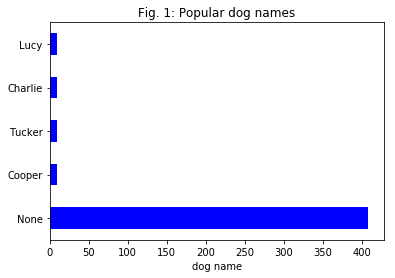

In [267]:
# count of dog names
name_df = dog_tweets.name.value_counts()[:5]
# plot a barchart
name_df.plot.barh(color='Blue')
plt.title('Fig. 1: Popular dog names')
plt.xlabel('dog name')
#save fig
plt.savefig('images/dog_name.png')
plt.show();

> Top 5 popular dog names include Charlie, Cooper, Oliver, Lucy and Sadie. However most dog names were not mentioned.

#### 2. Which dog stage has higher retweets and likes?

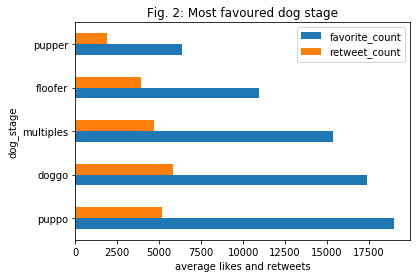

In [268]:
# group by dog stage and show 
stage_df = dog_tweets.groupby('dog_stage')[['favorite_count','retweet_count']].mean().sort_values(['favorite_count', 'retweet_count'], ascending=False)

stage_df.plot(kind='barh', figsize=(6,4))
        
plt.title('Fig. 2: Most favoured dog stage')
plt.xlabel('average likes and retweets')
plt.ylabel('dog_stage')
plt.savefig('images/favorite_retweet.png', bbox_inches='tight', dpi = 300);
plt.show();


In [269]:
# expanded url, image url and name
dog_tweets.query('dog_stage == "puppo"')[['expanded_urls', 'jpg_url','name']][:4]

,expanded_urls,jpg_url,name
11,https://twitter.com/dog_rates/status/889665388333682689/photo/1,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,None
13,https://twitter.com/dog_rates/status/889531135344209921/photo/1,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,Stuart
56,"https://twitter.com/dog_rates/status/878776093423087618/photo/1,https://twitter.com/dog_rates/status/878776093423087618/photo/1",https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Snoopy
72,"https://twitter.com/dog_rates/status/874012996292530176/photo/1,https://twitter.com/dog_rates/status/874012996292530176/photo/1",https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,Sebastian


> Averagely, puppos are the most retweeted and liked dog stage. However most dog stages are unknown.

#### 3.  What are the 5 favorite dog breeds?

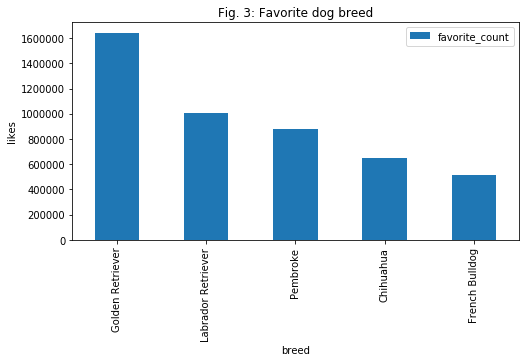

In [270]:
breed_favorite = dog_tweets.groupby('breed')[['favorite_count']].sum().sort_values(['favorite_count'], ascending=False)[:5]
breed_favorite.plot(kind='bar', figsize=(8, 4))
plt.title('Fig. 3: Favorite dog breed')
plt.xlabel('breed')
plt.ylabel('likes')
plt.savefig('images/breed_rating.png', bbox_inches='tight', dpi = 300);
plt.show();

In [271]:
# let's get the image url
dog_tweets.query('breed == "Golden Retriever"')[['text','tweet_id', 'expanded_urls','jpg_url']][:1]

,text,tweet_id,expanded_urls,jpg_url
13,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,889531135344209921,https://twitter.com/dog_rates/status/889531135344209921/photo/1,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg


In [272]:
# let's get the image url
dog_tweets.query('breed == "Labrador Retriever"')[['text','tweet_id', 'expanded_urls','jpg_url']][:4]

,text,tweet_id,expanded_urls,jpg_url
2,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
40,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,882762694511734784,https://twitter.com/dog_rates/status/882762694511734784/photo/1,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg
54,This is Jack AKA Stephen Furry. You're not scoring on him. Unless he slips down the slide. 12/10 would happily get blocked by https://t.co/0gOi601EAa,879376492567855104,https://twitter.com/dog_rates/status/879376492567855104/photo/1,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg
66,"This is Goose. He's a womanizer. Cheeky as h*ck, but also deep. Tongue slip game on another level. 13/10 will steal your girl https://t.co/V2WlACRJCN",875747767867523072,https://twitter.com/dog_rates/status/875747767867523072/photo/1,https://pbs.twimg.com/media/DCdH8YpUQAAiEbL.jpg


> The top 5 most popular dog breeds include the Golden Retriever, Labrador Retriever, Chihuahua, Pembroke and Pug.

### Visualization

#### 4. Is there a relationship between retweeted_count and favorite_count?

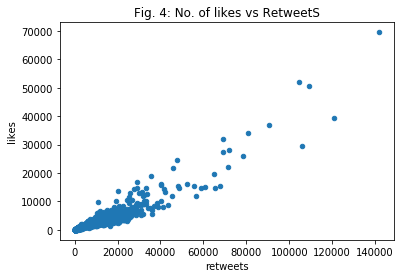

In [273]:
retweet_like = dog_tweets.plot(x='favorite_count', y = 'retweet_count', kind='scatter');

plt.title('Fig. 4: No. of likes vs RetweetS')
plt.xlabel('retweets')
plt.ylabel('likes')
plt.savefig('images/retweet_vs_favorite.png', bbox_inches='tight', dpi = 300);
plt.show();

In [274]:
# pearson correlation
dog_tweets.retweet_count.corr(dog_tweets.favorite_count, method='pearson')

0.93118983827944357

> There is a strong correlation between retweet_counts and favorite_counts.

#### 5. Which popular device tweets were tweeted from?

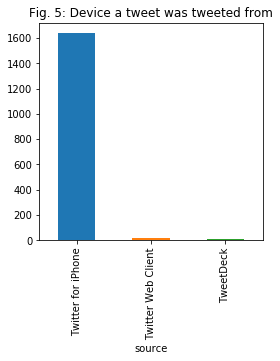

In [275]:
# value count of source
source_df = dog_tweets.source.value_counts()

# plot a pie chart
source_df.plot(kind='bar', figsize=(4,4)) 
plt.title('Fig. 5: Device a tweet was tweeted from')
plt.xlabel('source')
# save fig
plt.savefig('images/source_count.png', bbox_inches='tight', dpi = 300)
plt.show();

> Mostly, dog lovers access WeRateDogs twitter account using twitter for iphone.

<a id='conclusions'></a>
## Conclusions

<a id='conclusions'></a>
Assessing and cleaning the entire dataset completely would require a lot of time, and was not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project were only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

A summary report of this data wrangling and analysis process can be found [here](https://viewf6b31853.udacity-student-workspaces.com/notebooks/act_report.ipynb).

#### References
> 1. https://en.wikipedia.org/wiki/WeRateDogs
> 2. https://www.geeksforgeeks.org/
> 3. https://pandas.pydata.org/docs/user_guide/index.html
> 4. [@dog_rates](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwji64q8wpz8AhUaUsAKHe6ZBXsQ6F56BAgOEAE&url=https%3A%2F%2Ftwitter.com%2Fdog_rates%3Fref_src%3Dtwsrc%255Egoogle%257Ctwcamp%255Eserp%257Ctwgr%255Eauthor&usg=AOvVaw0JC6sX84zCg78EBo8iE3yn)
> 4. https://stackoverflow.com/